In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("data.csv")
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
data.drop('Unnamed: 32' , axis=1 , inplace = True)

In [5]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
x = data.iloc[:,2:32]
y = data.iloc[:,1]

In [12]:
Label = LabelEncoder()
y = Label.fit_transform(y)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [16]:
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size = 0.2 , random_state=0)

In [19]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [21]:
model = Sequential()

model.add(Dense(units = 16 , kernel_initializer = 'uniform' , activation = 'relu' , input_dim = 30))
model.add(Dense(units = 8 , kernel_initializer = 'uniform' , activation = 'relu'))
model.add(Dense(units = 6 , kernel_initializer = 'uniform' , activation = 'relu'))
model.add(Dense(units = 1 , kernel_initializer= 'uniform' , activation = 'sigmoid'))

In [23]:
model.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [24]:
history = model.fit(train_x , train_y , batch_size = 1 , epochs = 100)

Epoch 1/100
455/455 [==============================] - 3s 6ms/step - loss: 0.5830 - accuracy: 0.8615
Epoch 2/100
455/455 [==============================] - 1s 3ms/step - loss: 0.1610 - accuracy: 0.9648
Epoch 3/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9736
Epoch 4/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0910 - accuracy: 0.9758
Epoch 5/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9780
Epoch 6/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9802
Epoch 7/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9824
Epoch 8/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9824
Epoch 9/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9846
Epoch 10/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0935 - accura

455/455 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9912
Epoch 80/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9912
Epoch 81/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0556 - accuracy: 0.9890
Epoch 82/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0528 - accuracy: 0.9912
Epoch 83/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0591 - accuracy: 0.9912
Epoch 84/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0546 - accuracy: 0.9912
Epoch 85/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9912
Epoch 86/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9912
Epoch 87/100
455/455 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9912
Epoch 88/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 

In [25]:
pred_y = model.predict(test_x)
pred_y = [1 if y>=0.5 else 0 for y in pred_y]

In [27]:
print(pred_y)


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


In [29]:
print(test_y)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


In [31]:
confusion_matrix(test_y , pred_y)

array([[67,  0],
       [ 3, 44]], dtype=int64)

In [33]:
accuracy_score(test_y , pred_y)

0.9736842105263158

In [35]:
history

Text(0,0.5,'Accuracy')

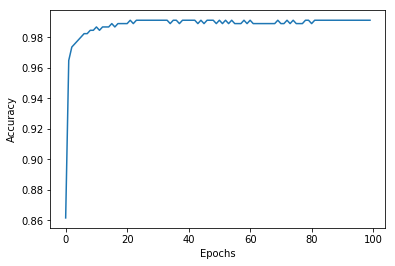

In [40]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


Text(0,0.5,'Loss')

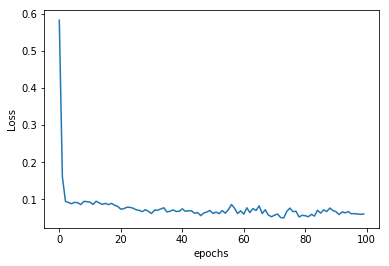

In [41]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')

##Parameter Tuning

In [49]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 16 , kernel_initializer = 'uniform' , activation = 'relu' , input_dim = 30))
    classifier.add(Dense(units = 8 , kernel_initializer = 'uniform' , activation = 'relu'))
    classifier.add(Dense(units = 6 , kernel_initializer = 'uniform' , activation = 'relu'))
    classifier.add(Dense(units = 1 , kernel_initializer = 'uniform' , activation = 'sigmoid' ))
    
    classifier.compile(optimizer = optimizer , loss = 'binary_crossentropy' , metrics = ['accuracy'])
    
    return classifier
    

In [50]:
classifier = KerasClassifier(build_fn = build_classifier)

parameter = {'batch_size' : [1,5] , 'epochs' : [50 , 100,120] , 'optimizer' : ['adam' , 'rmsprop']}

grid = GridSearchCV(estimator=classifier , param_grid=parameter , scoring='accuracy' ,cv=10)


In [51]:
grid_search = grid.fit(train_x , train_y)

Epoch 1/50
409/409 [==============================] - 2s 4ms/step - loss: 0.4499 - accuracy: 0.7726
Epoch 2/50
409/409 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.9682
Epoch 3/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9780
Epoch 4/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9804
Epoch 5/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0656 - accuracy: 0.9829
Epoch 6/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9878
Epoch 7/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0565 - accuracy: 0.9878
Epoch 8/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9878
Epoch 9/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0492 - accuracy: 0.9878
Epoch 10/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0474 - accuracy: 0.9878

409/409 [==============================] - 1s 3ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 32/50
409/409 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.98 - 1s 2ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 33/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 34/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9902
Epoch 35/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 36/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 37/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 38/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 39/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 40/50
409/409 [==============================] - 1s 3ms

409/409 [==============================] - 1s 2ms/step - loss: 0.6593 - accuracy: 0.6308
Epoch 12/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6591 - accuracy: 0.6308
Epoch 13/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6590 - accuracy: 0.6308
Epoch 14/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6589 - accuracy: 0.6308
Epoch 15/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6589 - accuracy: 0.6308
Epoch 16/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6588 - accuracy: 0.6308
Epoch 17/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6588 - accuracy: 0.6308
Epoch 18/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6587 - accuracy: 0.6308
Epoch 19/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6588 - accuracy: 0.6308
Epoch 20/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6587 - accuracy: 0.6308
Ep

409/409 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 43/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 44/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 45/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 46/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 47/50
409/409 [==============================] - 1s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 48/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 49/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9927
Epoch 50/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0378 - accuracy: 0.9927
Epoch 1/50
410/410 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8927
Epo

410/410 [==============================] - 1s 2ms/step - loss: 0.0369 - accuracy: 0.9854
Epoch 23/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 0.9927
Epoch 24/50
410/410 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9951
Epoch 25/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9927
Epoch 26/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 0.9927
Epoch 27/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9927
Epoch 28/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9951
Epoch 29/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0153 - accuracy: 0.9951
Epoch 30/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0159 - accuracy: 0.9976
Epoch 31/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0117 - accuracy: 0.9951
Ep

410/410 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9707
Epoch 3/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9780
Epoch 4/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9878
Epoch 5/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9854
Epoch 6/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9878
Epoch 7/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9878
Epoch 8/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9902
Epoch 9/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0446 - accuracy: 0.9902
Epoch 10/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9878
Epoch 11/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0426 - accuracy: 0.9902
Epoch 12/

410/410 [==============================] - 1s 2ms/step - loss: 0.0142 - accuracy: 0.9927
Epoch 33/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0138 - accuracy: 0.9951
Epoch 34/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0318 - accuracy: 0.9854
Epoch 35/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0116 - accuracy: 0.9951
Epoch 36/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.9976 ETA: 0s -
Epoch 37/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0085 - accuracy: 0.9976
Epoch 38/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0089 - accuracy: 0.9976
Epoch 39/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0089 - accuracy: 0.9976
Epoch 40/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9976
Epoch 41/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy:

409/409 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9878
Epoch 13/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9853
Epoch 14/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9878
Epoch 15/50
409/409 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9878
Epoch 16/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9878
Epoch 17/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9878
Epoch 18/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9878
Epoch 19/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9878
Epoch 20/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9878
Epoch 21/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9878
Ep

409/409 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9902
Epoch 44/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9878
Epoch 45/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0641 - accuracy: 0.9902
Epoch 46/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9878
Epoch 47/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9878
Epoch 48/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9878
Epoch 49/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9878
Epoch 50/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0642 - accuracy: 0.9902
Epoch 1/50
409/409 [==============================] - 1s 3ms/step - loss: 0.4779 - accuracy: 0.8313
Epoch 2/50
409/409 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9633
Epoc

409/409 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9902
Epoch 24/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9902
Epoch 25/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9902
Epoch 26/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9902
Epoch 27/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9927
Epoch 28/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9902
Epoch 29/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0.9927
Epoch 30/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0664 - accuracy: 0.9927
Epoch 31/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9927
Epoch 32/50
409/409 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9927
Ep

410/410 [==============================] - 1s 2ms/step - loss: 0.1190 - accuracy: 0.9683
Epoch 4/50
410/410 [==============================] - 1s 2ms/step - loss: 0.1187 - accuracy: 0.9756
Epoch 5/50
410/410 [==============================] - 1s 2ms/step - loss: 0.1087 - accuracy: 0.9756
Epoch 6/50
410/410 [==============================] - 1s 2ms/step - loss: 0.1049 - accuracy: 0.9756
Epoch 7/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9829
Epoch 8/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9854
Epoch 9/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9829
Epoch 10/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9829
Epoch 11/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9854
Epoch 12/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9829
Epoch 13

410/410 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9878
Epoch 34/50
410/410 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9902
Epoch 35/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9878
Epoch 36/50
410/410 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9902
Epoch 37/50
410/410 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9878
Epoch 38/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9878
Epoch 39/50
410/410 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9878
Epoch 40/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0.9878
Epoch 41/50
410/410 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9902
Epoch 42/50
410/410 [==============================] - 1s 3ms/step - loss: 0.0736 - accuracy: 0.9878
Ep

410/410 [==============================] - 1s 3ms/step - loss: 0.6542 - accuracy: 0.6390
Epoch 15/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6542 - accuracy: 0.6390
Epoch 16/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6544 - accuracy: 0.6390
Epoch 17/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6543 - accuracy: 0.6390
Epoch 18/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6544 - accuracy: 0.6390
Epoch 19/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6544 - accuracy: 0.6390
Epoch 20/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6545 - accuracy: 0.6390
Epoch 21/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6545 - accuracy: 0.6390
Epoch 22/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6546 - accuracy: 0.6390
Epoch 23/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6546 - accuracy: 0.6390
Ep

409/409 [==============================] - 1s 3ms/step - loss: 0.0101 - accuracy: 0.9951
Epoch 44/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 45/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 46/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 47/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 48/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 49/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 50/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 51/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 52/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0029 - accuracy: 

409/409 [==============================] - 1s 2ms/step - loss: 0.0259 - accuracy: 0.9902
Epoch 23/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0251 - accuracy: 0.9902
Epoch 24/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9927
Epoch 25/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0235 - accuracy: 0.9902
Epoch 26/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9951
Epoch 27/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0190 - accuracy: 0.9951
Epoch 28/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0406 - accuracy: 0.9853
Epoch 29/100
409/409 [==============================] - 1s 2ms/step - loss: 0.0198 - accuracy: 0.9951
Epoch 30/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9951
Epoch 31/100
409/409 [==============================] - 1s 3ms/step - loss: 0.0163 - accuracy: 

409/409 [==============================] - 1s 2ms/step - loss: 5.9689e-06 - accuracy: 1.0000
Epoch 100/100
409/409 [==============================] - 1s 2ms/step - loss: 5.5989e-06 - accuracy: 1.0000
Epoch 1/100
409/409 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8411
Epoch 2/100
409/409 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9707
Epoch 3/100
409/409 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9804
Epoch 4/100
409/409 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9829
Epoch 5/100
409/409 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.9853
Epoch 6/100
409/409 [==============================] - 1s 2ms/step - loss: 0.0591 - accuracy: 0.9878
Epoch 7/100
409/409 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9853
Epoch 8/100
409/409 [==============================] - 1s 2ms/step - loss: 0.0502 - accuracy:

409/409 [==============================] - 1s 2ms/step - loss: 3.5808e-04 - accuracy: 1.0000
Epoch 79/100
409/409 [==============================] - 1s 2ms/step - loss: 3.2951e-04 - accuracy: 1.0000
Epoch 80/100
409/409 [==============================] - 1s 2ms/step - loss: 3.1565e-04 - accuracy: 1.0000
Epoch 81/100
409/409 [==============================] - 1s 2ms/step - loss: 2.8645e-04 - accuracy: 1.0000
Epoch 82/100
409/409 [==============================] - 1s 2ms/step - loss: 2.6244e-04 - accuracy: 1.0000
Epoch 83/100
409/409 [==============================] - 1s 2ms/step - loss: 2.6626e-04 - accuracy: 1.0000
Epoch 84/100
409/409 [==============================] - 1s 2ms/step - loss: 2.6523e-04 - accuracy: 1.0000
Epoch 85/100
409/409 [==============================] - 1s 2ms/step - loss: 1.9993e-04 - accuracy: 1.0000
Epoch 86/100
409/409 [==============================] - 1s 2ms/step - loss: 1.7302e-04 - accuracy: 1.0000
Epoch 87/100
409/409 [==============================] - 1s 

409/409 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9927
Epoch 57/100
409/409 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 58/100
409/409 [==============================] - 1s 2ms/step - loss: 7.6818e-04 - accuracy: 1.0000
Epoch 59/100
409/409 [==============================] - 1s 2ms/step - loss: 1.0787e-04 - accuracy: 1.0000
Epoch 60/100
409/409 [==============================] - 1s 2ms/step - loss: 9.9562e-05 - accuracy: 1.0000
Epoch 61/100
409/409 [==============================] - 1s 2ms/step - loss: 9.1663e-05 - accuracy: 1.0000
Epoch 62/100
409/409 [==============================] - 1s 2ms/step - loss: 8.5386e-05 - accuracy: 1.0000
Epoch 63/100
409/409 [==============================] - 1s 2ms/step - loss: 7.8761e-05 - accuracy: 1.0000
Epoch 64/100
409/409 [==============================] - 1s 2ms/step - loss: 7.2382e-05 - accuracy: 1.0000
Epoch 65/100
409/409 [==============================] - 1s 2ms/step

409/409 [==============================] - 1s 2ms/step - loss: 6.8586e-04 - accuracy: 1.0000
Epoch 35/100
409/409 [==============================] - 1s 2ms/step - loss: 4.6292e-04 - accuracy: 1.0000
Epoch 36/100
409/409 [==============================] - 1s 2ms/step - loss: 4.5278e-04 - accuracy: 1.0000
Epoch 37/100
409/409 [==============================] - 1s 2ms/step - loss: 2.8741e-04 - accuracy: 1.0000
Epoch 38/100
409/409 [==============================] - 1s 2ms/step - loss: 2.2229e-04 - accuracy: 1.0000
Epoch 39/100
409/409 [==============================] - 1s 2ms/step - loss: 2.1048e-04 - accuracy: 1.0000
Epoch 40/100
409/409 [==============================] - 1s 2ms/step - loss: 1.3484e-04 - accuracy: 1.0000
Epoch 41/100
409/409 [==============================] - 1s 2ms/step - loss: 1.1696e-04 - accuracy: 1.0000
Epoch 42/100
409/409 [==============================] - 1s 2ms/step - loss: 1.0447e-04 - accuracy: 1.0000
Epoch 43/100
409/409 [==============================] - 1s 

KeyboardInterrupt: 